In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [8]:
# normalized stars (first 1000 reviews)
urlSent = "C:/Users/justy/Documents/GitHub/inf553-adjusted-ratings/sentiment-api-results/google_results.json"
Qsent = pd.read_json(urlSent)

# sentiment analysis (first 1000 reviews)
urlNorm = "C:/Users/justy/Documents/GitHub/inf553-adjusted-ratings/stat-analysis/user_normalizedStars.json"
Qnorm = pd.read_json(urlNorm)


In [9]:
print(len(Qsent))
Qsent.head(3)

1000


,business_id,magnitude-google,review_id,sentiment-google,stars,text,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,3.2,x7mDIiDB3jEiPGPHOmDzyw,-0.1,2,The pizza was okay. Not the best I've had. I p...,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,5.8,dDl8zu1vWPdKGihJrwQbpw,0.7,5,I love this place! My fiance And I go here atl...,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,2.0,LZp4UX5zK3e-c5ZGSeo3kA,-0.3,1,Terrible. Dry corn bread. Rib tips were all fa...,msQe1u7Z_XuqjGoqhB0J5g


In [10]:
Qnorm.head(3)

,Adj_Stars,Modal,Reviews,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,2.865148,2,10,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,3.223607,2,10,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,1.952277,2,10,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g


In [63]:
starSentDF = pd.concat([Qsent['sentiment-google'], Qsent['stars'], Qnorm['Reviews'], Qnorm['user_id']], axis=1, keys=['sentiment', 'stars', 'reviews', 'user'])
normStarsDF = pd.concat([Qnorm['Adj_Stars'], Qnorm['stars'], Qnorm['Reviews'], Qnorm['user_id']], axis=1, keys=['normalized', 'stars', 'reviews', 'user'])
normSentDF = pd.concat([Qnorm['Adj_Stars'], Qsent['sentiment-google'], Qnorm['Reviews'], Qnorm['user_id']], axis=1, keys=['normalized', 'sentiment', 'reviews', 'user'])

In [139]:
normStarsDF.head(2)

,normalized,stars,reviews,user
0,2.865148,2,10,msQe1u7Z_XuqjGoqhB0J5g
1,3.223607,5,10,msQe1u7Z_XuqjGoqhB0J5g


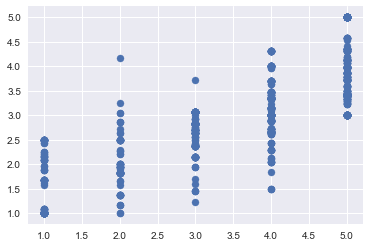

In [141]:
normStarsArr = normStarsDF.values
plt.scatter(normStarsArr[:, 1], normStarsArr[:, 0], s=50);


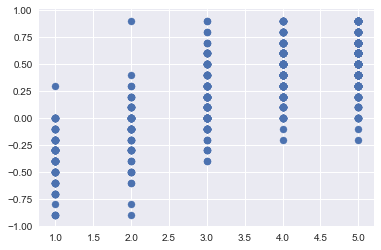

In [125]:
starSentArr = starSentDF.values
plt.scatter(starSentArr[:, 1], starSentArr[:, 0], s=50);


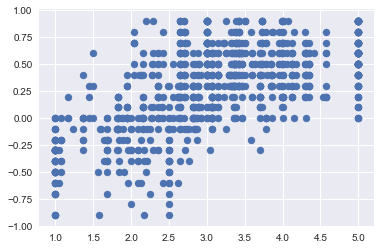

In [144]:
normStarsArr = normStarsDF.values
plt.scatter(normSentArr[:, 0], normSentArr[:, 1], s=50);

In [85]:
normSentDF['color'] = 'black'
normSentDF.loc[(normSentDF['reviews'] > 1) & (normSentDF['reviews'] < 5), 'color'] = 'blue'
normSentDF.loc[(normSentDF['reviews'] > 5) & (normSentDF['reviews'] < 10), 'color'] = 'green'
normSentDF.loc[(normSentDF['reviews'] > 10) & (normSentDF['reviews'] < 15), 'color'] = 'yellow'
normSentDF.loc[(normSentDF['reviews'] > 15) & (normSentDF['reviews'] < 25), 'color'] = 'orange'
normSentDF.loc[(normSentDF['reviews'] > 25), 'color'] = 'red'

In [147]:
normSentDF['color'] = normSentDF['user'].apply(lambda x: hash(x) % 1024)
normSentDFfilter = normSentDF[normSentDF['reviews'] > 1]

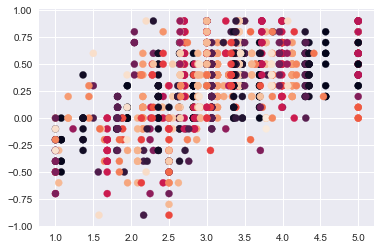

In [148]:
normSentArr = normSentDFfilter.drop(['user', 'reviews'], axis=1).values
plt.scatter(normSentArr[:, 0], normSentArr[:, 1], s=50, c=normSentArr[:,2]);

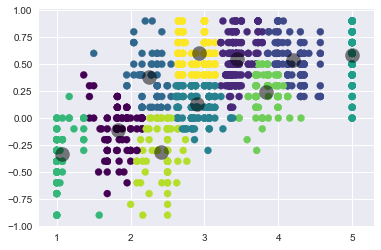

In [48]:
# Create k-means clusters
kmeans = KMeans(n_clusters=10)
kmeans.fit(normSentArr)
y_kmeans = kmeans.predict(normSentArr)

# Plot results
plt.scatter(normSentArr[:, 0], normSentArr[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);